#  Choose The Best Machine Learning Model

Compare Machine Learning Algorithms Consistently

- Linear
    - Logistic Regression
    - Linear Discriminant Analysis
- Nonlinear
    - k-Nearest Neighbors
    - Naive Bayes
    - Classification and Regression Trees
    - Support Vector Machines

LR:0.76951(0.04841)
LDA:0.77346(0.05159)
KNN:0.72656(0.06182)
NB:0.75518(0.04277)
CART:0.69265(0.06042)
SVM:0.65103(0.07214)


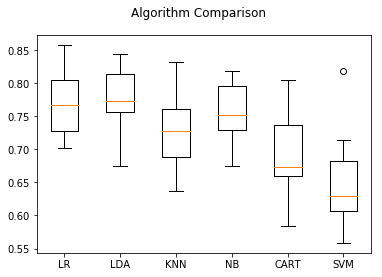

In [1]:
# Load CSV using Pandas from URL
from pandas import read_csv

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg ','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names=names)

X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{0}:{1:.5f}({2:.5f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

# Box plot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()